In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('/content/Crude Oil Prices Daily.xlsx')
df

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
8218,2018-07-03,74.19
8219,2018-07-04,NaN
8220,2018-07-05,73.05
8221,2018-07-06,73.78


In [3]:
# EDA
df.shape

(8223, 2)

In [4]:
df.head()

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [5]:
df.tail()

,Date,Closing Value
8218,2018-07-03,74.19
8219,2018-07-04,NaN
8220,2018-07-05,73.05
8221,2018-07-06,73.78
8222,2018-07-09,73.93


In [6]:
df.describe()

,Date,Closing Value
count,8223,8216.000000
mean,2002-04-05 22:11:15.082086912,43.492139
min,1986-01-02 00:00:00,10.250000
25%,1994-01-25 12:00:00,19.577500
50%,2002-04-02 00:00:00,29.610000
75%,2010-06-12 12:00:00,63.402500
max,2018-07-09 00:00:00,145.310000
std,NaN,29.616804


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8223 non-null   datetime64[ns]
 1   Closing Value  8216 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 128.6 KB


In [8]:
df.isnull().sum()

,0
Date,0
Closing Value,7


In [9]:
df['Closing Value'].fillna(df['Closing Value'].mean(), inplace = True)

In [10]:
df.isnull().sum()

,0
Date,0
Closing Value,0


In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [12]:
df.dtypes

,0
Date,datetime64[ns]
Closing Value,float64


In [13]:
Q1 = df['Closing Value'].quantile(0.25)
Q3 = df['Closing Value'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df_outliers = df[(df['Closing Value'] < lower_bound) | (df['Closing Value'] > upper_bound)]
print('Number of Outliers:' , len(df_outliers))
df_outliers

Number of Outliers: 34


,Date,Closing Value
5648,2008-05-21,132.99
5649,2008-05-22,130.04
5650,2008-05-23,131.58
5652,2008-05-28,131.00
5659,2008-06-06,138.51
5660,2008-06-09,134.44
5661,2008-06-10,131.38
5662,2008-06-11,136.43
5663,2008-06-12,136.91
5664,2008-06-13,134.84


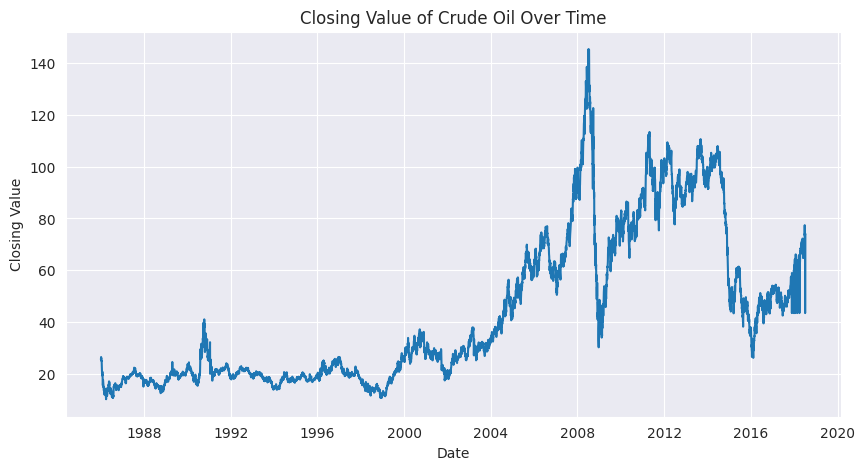

In [14]:
# DATA VISUALIZATION
# Line plot
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.lineplot(x = 'Date', y = 'Closing Value', data = df)
plt.title('Closing Value of Crude Oil Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Value')
plt.show()

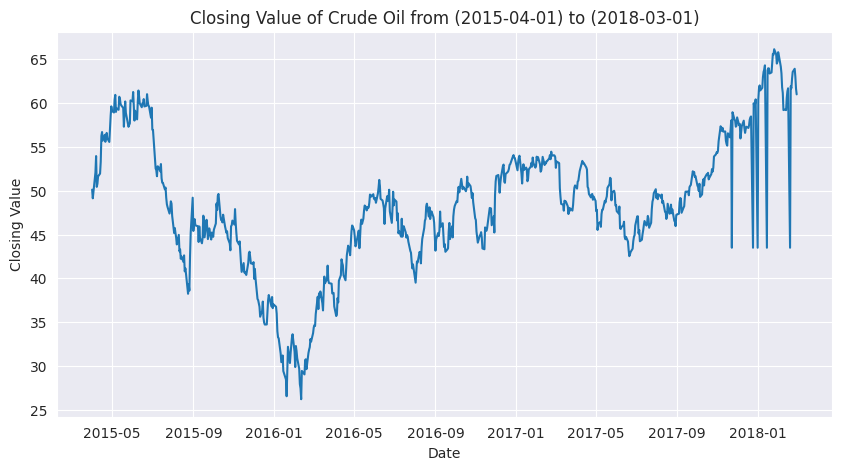

In [15]:
def plot_price_trend(df, start_date, end_date):
  filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
  plt.figure(figsize = (10,5))
  sns.lineplot(x = 'Date', y = 'Closing Value', data = filtered_df)
  plt.title('Closing Value of Crude Oil from (2015-04-01) to (2018-03-01)')
  plt.xlabel('Date')
  plt.ylabel('Closing Value')
  plt.show()
plot_price_trend(df, '2015-04-01', '2018-03-01')

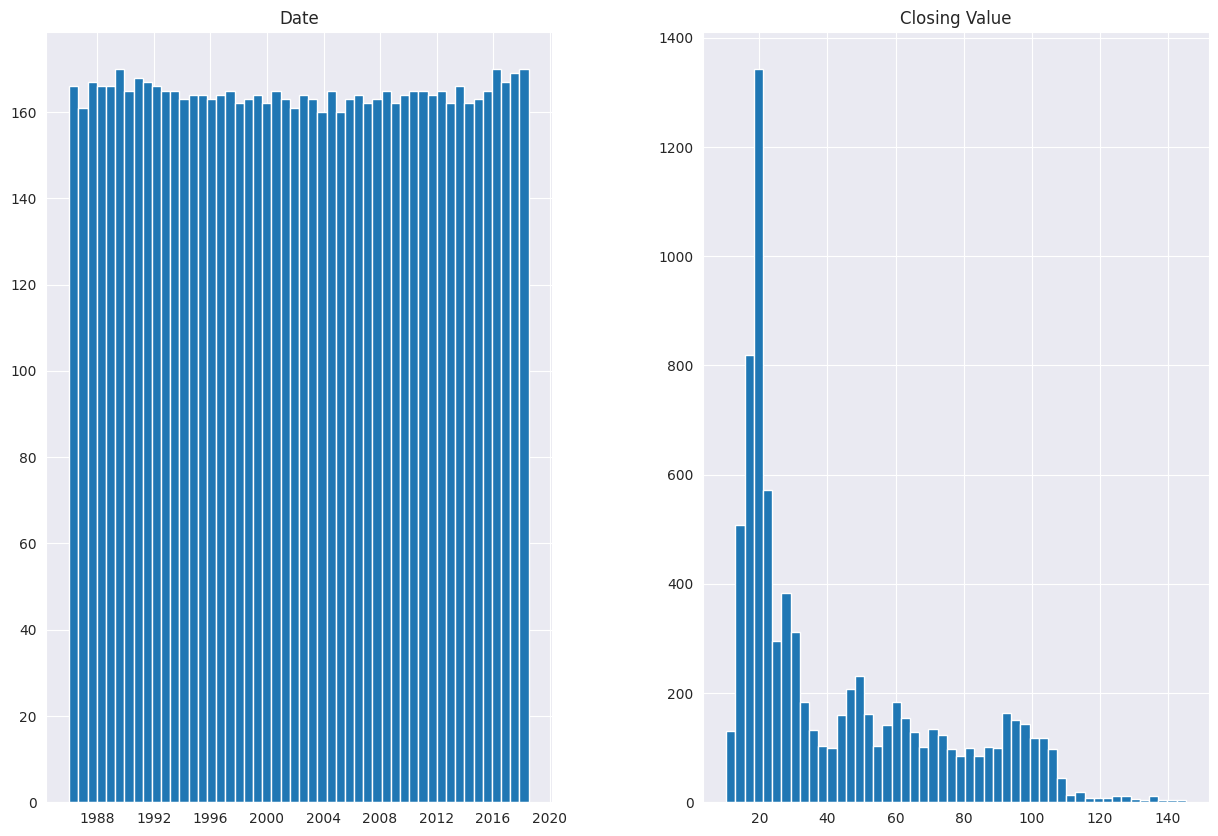

In [16]:
# Histogram
df.hist(bins = 50, figsize = (15,10))
plt.show()

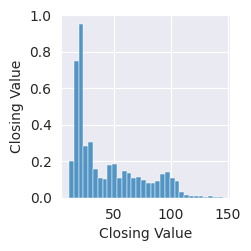

In [17]:
sns.pairplot(df)
plt.show()

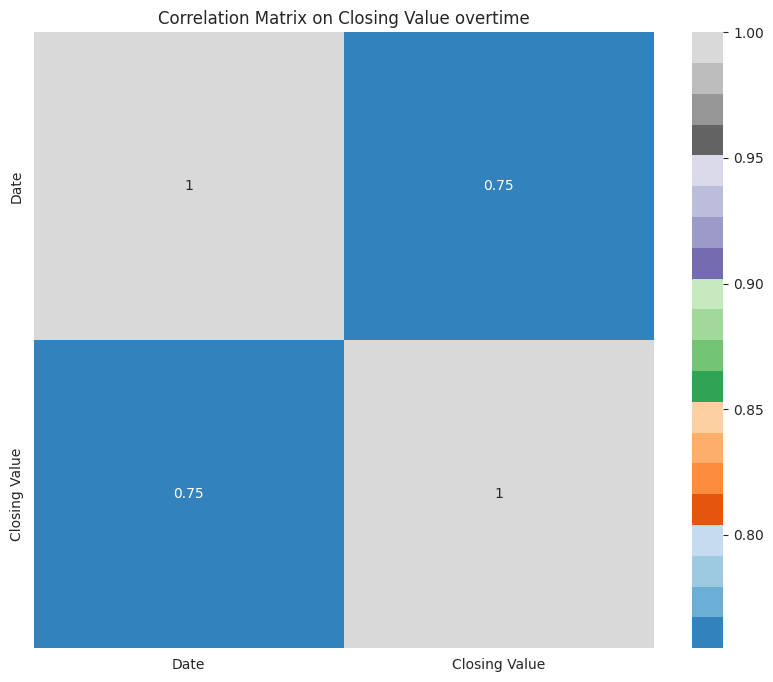

In [18]:
plt.figure(figsize = (10,8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'tab20c')
plt.title('Correlation Matrix on Closing Value overtime')
plt.show()

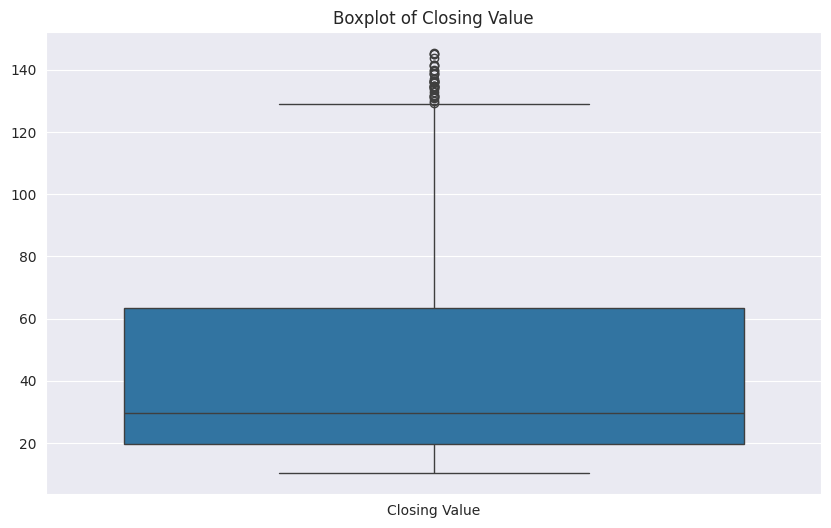

In [19]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df)
plt.title('Boxplot of Closing Value')
plt.show()

<Figure size 1000x600 with 0 Axes>

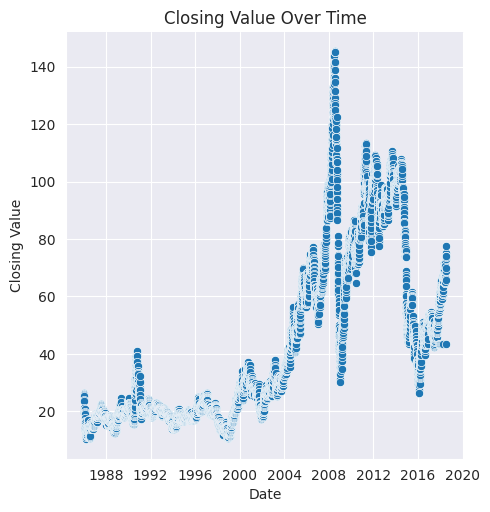

In [20]:
plt.figure(figsize = (10,6))
sns.relplot(x = 'Date', y = 'Closing Value', data = df)
plt.title('Closing Value Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Value')
plt.show()

In [21]:
# MODEL BUILDING / MODEL FORECASTING
# 1. ARIMA Model
# 2. FBProphet Model
# 3. Linear Regression Model
# 4. LSTM (LONG - SHORT TERM MEMORY)

In [22]:
# 1. ARIMA MODEL
!pip install pmdarima

In [23]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model_arima = ARIMA(df['Closing Value'], order = (5, 1, 0))
model_arima.fit = model_arima.fit()

In [24]:
# Forecasting for next 30 days
forecast_arima = model_arima.fit.forecast(steps = 30)
forecast_arima

,predicted_mean
8223,73.500150
8224,73.777619
8225,73.649127
8226,73.662335
8227,73.662736
8228,73.665288
8229,73.663272
8230,73.664012
8231,73.663908
8232,73.663911


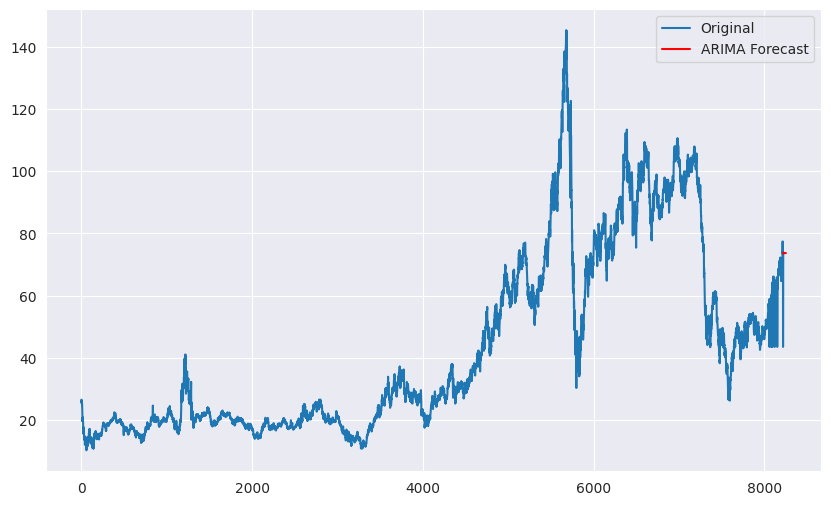

In [25]:
plt.figure(figsize = (10, 6))
plt.plot(df['Closing Value'], label = 'Original')
plt.plot(forecast_arima, label = 'ARIMA Forecast', color = 'red')
plt.legend()
plt.show()

In [26]:
mae_arima = mean_absolute_error(df['Closing Value'][-30:], forecast_arima) # Compare the last 30 values of the dataset to the forecast
mse_arima = mean_squared_error(df['Closing Value'][-30:], forecast_arima)
r2_arima = r2_score(df['Closing Value'][-30:], forecast_arima)

print('Mean Absolute Error (MAE):', mae_arima)
print('Mean Squared Error (MSE):', mse_arima)
print('R-squared (R2):', r2_arima)

Mean Absolute Error (MAE): 6.134121382417772
Mean Squared Error (MSE): 67.67311309111103
R-squared (R2): -0.9061537875251184


In [27]:
# FBPROPHET MODEL
!pip install prophet

In [28]:
from prophet import Prophet

df_prophet = df.reset_index()[['Date', 'Closing Value']].rename(columns = {'Date': 'ds', 'Closing Value': 'y'})
df_prophet

,ds,y
0,1986-01-02,25.560000
1,1986-01-03,26.000000
2,1986-01-06,26.530000
3,1986-01-07,25.850000
4,1986-01-08,25.870000
...,...,...
8218,2018-07-03,74.190000
8219,2018-07-04,43.492139
8220,2018-07-05,73.050000
8221,2018-07-06,73.780000


In [29]:
model_prophet = Prophet()
model_prophet.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_h9n6qab/v1jak152.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_h9n6qab/ux3o08dg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99975', 'data', 'file=/tmp/tmp_h9n6qab/v1jak152.json', 'init=/tmp/tmp_h9n6qab/ux3o08dg.json', 'output', 'file=/tmp/tmp_h9n6qab/prophet_modeltn1m6o0v/prophet_model-20240924142429.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:24:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:24:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [30]:
future_dataframe = model_prophet.make_future_dataframe(periods = 30)
future_dataframe

,ds
0,1986-01-02
1,1986-01-03
2,1986-01-06
3,1986-01-07
4,1986-01-08
...,...
8248,2018-08-04
8249,2018-08-05
8250,2018-08-06
8251,2018-08-07


In [31]:
forecast_prophet = model_prophet.predict(future_dataframe)
forecast_prophet

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1986-01-02,13.541831,0.551907,26.687167,13.541831,13.541831,0.049540,0.049540,0.049540,1.742412,1.742412,1.742412,-1.692872,-1.692872,-1.692872,0.0,0.0,0.0,13.591371
1,1986-01-03,13.545448,-0.455315,27.503173,13.545448,13.545448,0.080411,0.080411,0.080411,1.721171,1.721171,1.721171,-1.640761,-1.640761,-1.640761,0.0,0.0,0.0,13.625858
2,1986-01-06,13.556297,-0.076814,27.859679,13.556297,13.556297,0.156605,0.156605,0.156605,1.681694,1.681694,1.681694,-1.525088,-1.525088,-1.525088,0.0,0.0,0.0,13.712902
3,1986-01-07,13.559914,1.080978,26.021914,13.559914,13.559914,0.101456,0.101456,0.101456,1.602673,1.602673,1.602673,-1.501218,-1.501218,-1.501218,0.0,0.0,0.0,13.661369
4,1986-01-08,13.563530,0.892291,27.570701,13.563530,13.563530,0.125347,0.125347,0.125347,1.610286,1.610286,1.610286,-1.484939,-1.484939,-1.484939,0.0,0.0,0.0,13.688877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8248,2018-08-04,37.824826,30.871761,57.331698,37.824826,37.824826,7.031800,7.031800,7.031800,5.953973,5.953973,5.953973,1.077827,1.077827,1.077827,0.0,0.0,0.0,44.856626
8249,2018-08-05,37.799229,11.428938,37.003161,37.799229,37.799229,-13.239683,-13.239683,-13.239683,-14.312210,-14.312210,-14.312210,1.072527,1.072527,1.072527,0.0,0.0,0.0,24.559546
8250,2018-08-06,37.773631,27.667109,53.868333,37.773631,37.773631,2.747438,2.747438,2.747438,1.681694,1.681694,1.681694,1.065744,1.065744,1.065744,0.0,0.0,0.0,40.521069
8251,2018-08-07,37.748034,27.389784,54.286539,37.748034,37.748034,2.660056,2.660056,2.660056,1.602673,1.602673,1.602673,1.057383,1.057383,1.057383,0.0,0.0,0.0,40.408090


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


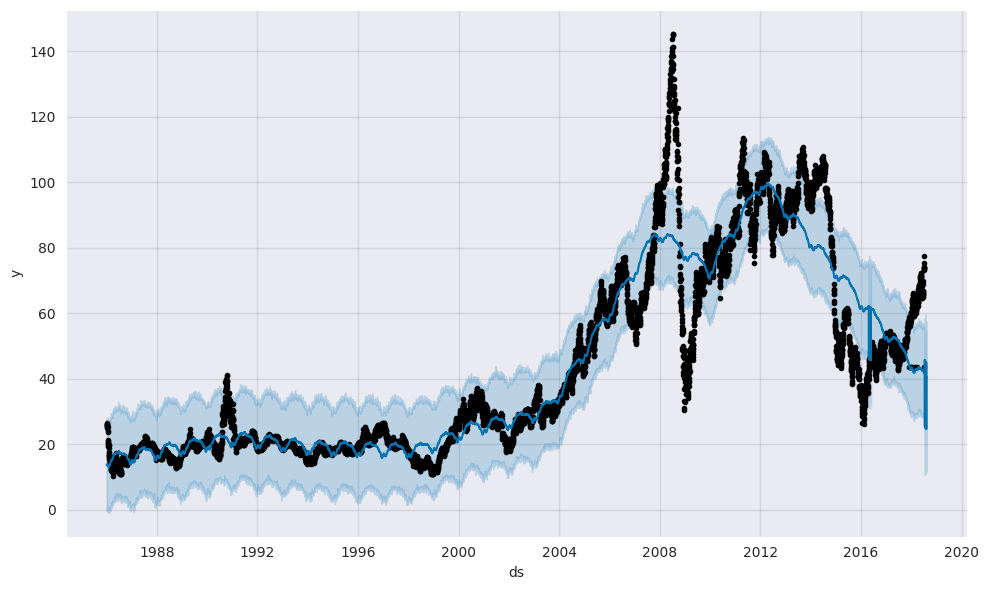

In [32]:
model_prophet.plot(forecast_prophet)
plt.show()

In [33]:
mae_prophet = mean_absolute_error(df['Closing Value'][-30:], forecast_prophet['yhat'][-30:])
mse_prophet = mean_squared_error(df['Closing Value'][-30:], forecast_prophet['yhat'][-30:])
r2_prophet = r2_score(df['Closing Value'][-30:], forecast_prophet['yhat'][-30:])

print('Mean Absolute Error (MAE):', mae_prophet)
print('Mean Squared Error (MSE):', mse_prophet)
print('R-squared (R2):', r2_prophet)

Mean Absolute Error (MAE): 28.586329579632025
Mean Squared Error (MSE): 859.7833234298984
R-squared (R2): -23.217583077644818


In [34]:
# 3. LINEAR REGRESSION MODEL
from sklearn.linear_model import LinearRegression

# Converting datetime (time-based data) into days (numerical sequence)
df['Days'] = (df['Date'] - df['Date'].min()).dt.days

# Features (X) and target (y)
X = df[['Days']]
y = df['Closing Value']

In [35]:
model_lr = LinearRegression()
model_lr.fit(X, y)

LinearRegression()

In [36]:
# Prediction for next 30 days
future_days = np.arange(df['Days'].max() + 1, df['Days'].max() + 31).reshape(-1, 1)
future_days

array([[11877],
       [11878],
       [11879],
       [11880],
       [11881],
       [11882],
       [11883],
       [11884],
       [11885],
       [11886],
       [11887],
       [11888],
       [11889],
       [11890],
       [11891],
       [11892],
       [11893],
       [11894],
       [11895],
       [11896],
       [11897],
       [11898],
       [11899],
       [11900],
       [11901],
       [11902],
       [11903],
       [11904],
       [11905],
       [11906]])

In [37]:
forecast_lr = model_lr.predict(future_days)
forecast_lr

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([82.0481361 , 82.05462802, 82.06111994, 82.06761186, 82.07410378,
       82.0805957 , 82.08708761, 82.09357953, 82.10007145, 82.10656337,
       82.11305529, 82.11954721, 82.12603913, 82.13253105, 82.13902297,
       82.14551489, 82.15200681, 82.15849872, 82.16499064, 82.17148256,
       82.17797448, 82.1844664 , 82.19095832, 82.19745024, 82.20394216,
       82.21043408, 82.216926  , 82.22341792, 82.22990983, 82.23640175])

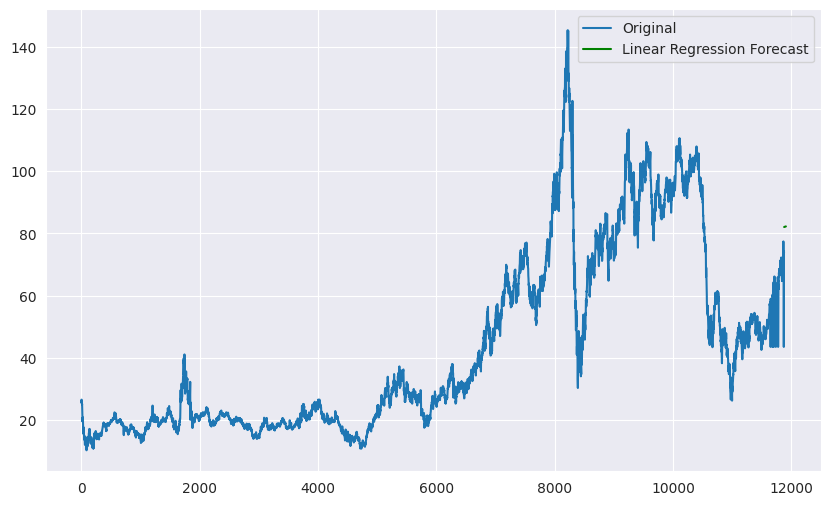

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(df['Days'], df['Closing Value'], label='Original')
plt.plot(future_days, forecast_lr, label='Linear Regression Forecast', color='green')
plt.legend()
plt.show()

In [39]:
mae_lr = mean_absolute_error(df['Closing Value'][-30:], forecast_lr[-30:])
mse_lr = mean_squared_error(df['Closing Value'][-30:], forecast_lr[-30:])
r2_lr = r2_score(df['Closing Value'][-30:], forecast_lr[-30:])

print('Mean Absolute Error (MAE):', mae_lr)
print('Mean Squared Error (MSE):', mse_lr)
print('R-squared (R2):', r2_lr)

Mean Absolute Error (MAE): 14.153864309737191
Mean Squared Error (MSE): 235.63812428971434
R-squared (R2): -5.63723719190261


In [40]:
# 4. LSTM (LONG - SHORT TERM MEMORY)
!pip install tensorflow

In [51]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Closing Value'].values.reshape(-1, 1))

# Prepare data for LSTM
X_lstm, y_lstm = [], []
time_step = 60
for i in range(time_step, len(scaled_data)):
    X_lstm.append(scaled_data[i-time_step:i, 0])
    y_lstm.append(scaled_data[i, 0])
X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)
X_lstm = X_lstm.reshape((X_lstm.shape[0], X_lstm.shape[1], 1))

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_lstm.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_model.fit(X_lstm, y_lstm, epochs=10, batch_size=32)

# Forecasting lstm model
forecast_lstm = lstm_model.predict(X_lstm[-30:])
forecast_lstm = scaler.inverse_transform(forecast_lstm).flatten()

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 24s 69ms/step - loss: 0.0146
Epoch 2/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step - loss: 0.0012
Epoch 3/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - loss: 0.0010
Epoch 4/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - loss: 9.7337e-04
Epoch 5/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step - loss: 8.2737e-04
Epoch 6/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - loss: 7.5496e-04
Epoch 7/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - loss: 7.1148e-04
Epoch 8/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 16s 61ms/step - loss: 7.3216e-04
Epoch 9/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - loss: 6.2667e-04
Epoch 10/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - loss: 6.6946e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


In [52]:
mae_lstm = mean_absolute_error(df['Closing Value'][-30:], forecast_lr[-30:])
mse_lstm = mean_squared_error(df['Closing Value'][-30:], forecast_lr[-30:])
r2_lstm = r2_score(df['Closing Value'][-30:], forecast_lr[-30:])

print('Mean Absolute Error (MAE):', mae_lstm)
print('Mean Squared Error (MSE):', mse_lstm)
print('R-squared (R2):', r2_lstm)

Mean Absolute Error (MAE): 14.153864309737191
Mean Squared Error (MSE): 235.63812428971434
R-squared (R2): -5.63723719190261


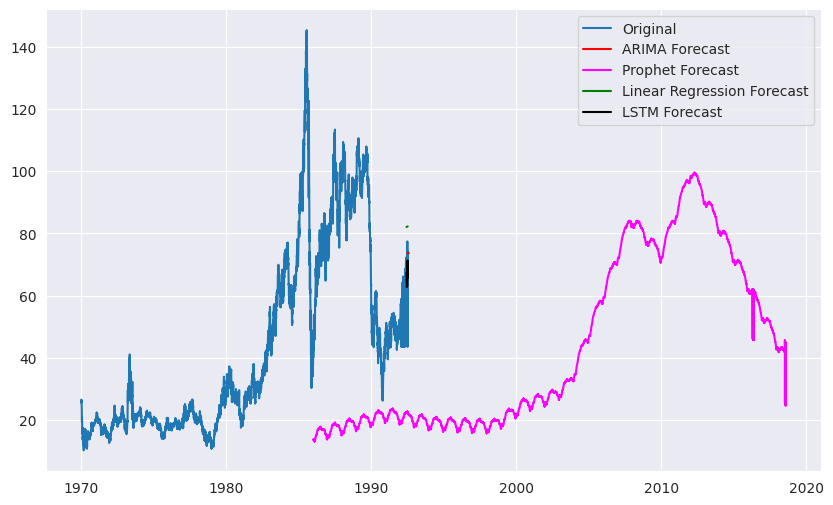

In [53]:
# COMPARISON OF ARIMA, PROPHET, LINEAR REGRESSION AND LSTM MODELS
plt.figure(figsize=(10, 6))
plt.plot(df['Closing Value'], label='Original')
plt.plot(forecast_arima, label='ARIMA Forecast', color='red')
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label='Prophet Forecast', color='magenta')
plt.plot(df.index[-30:], forecast_lr, label='Linear Regression Forecast', color='green')
plt.plot(df.index[-30:], forecast_lstm, label='LSTM Forecast', color='black') # Now you can plot forecast_lstm
plt.legend()
plt.show()

In [54]:
# Conclusion - ARIMA would be the most flexible and powerful model for deployment of the app.
# Especially if crude oil prices have some form of seasonality.

In [55]:
# Comparison of MAE, RMSE, R2_score
print('MAE - ARIMA:', mae_arima)
print('MAE - Prophet:', mae_prophet)
print('MAE - Linear Regression:', mae_lr)
print('MAE - LSTM:', mae_lstm)

MAE - ARIMA: 6.134121382417772
MAE - Prophet: 28.586329579632025
MAE - Linear Regression: 14.153864309737191
MAE - LSTM: 14.153864309737191


In [56]:
print('MSE - ARIMA:', mse_arima)
print('MSE - Prophet:', mse_prophet)
print('MSE - Linear Regression:', mse_lr)
print('MSE - LSTM:', mse_lstm)

MSE - ARIMA: 67.67311309111103
MSE - Prophet: 859.7833234298984
MSE - Linear Regression: 235.63812428971434
MSE - LSTM: 235.63812428971434


In [57]:
print('R2_score - ARIMA:', r2_arima)
print('R2_score - Prophet:', r2_prophet)
print('R2_score - Linear Regression:', r2_lr)
print('R2_score - LSTM:', r2_lstm)

R2_score - ARIMA: -0.9061537875251184
R2_score - Prophet: -23.217583077644818
R2_score - Linear Regression: -5.63723719190261
R2_score - LSTM: -5.63723719190261


In [58]:
# We have the lowest MAE and MSE with ARIMA Model an also the highest R2 score, With which we can proceed to deploy the app